In [ ]:
import os
import sys
import time

import GCode
import GRBL
import matplotlib.pyplot as plt
import numpy as np
#import ushr.coord.homogeneous as h
import seaborn as sns

All units in mm. ```1``` = ```1 mm```.

In [42]:
cnc = GRBL.GRBL(port="/dev/cnc_3018")
cnc.reset()
cnc.status


'<Idle|MPos:-248.293,-102.145,-1.000|Bf:15,127|FS:0,0|WCO:0.000,0.000,0.000>'

In [43]:
cnc.home()


18

In [19]:
def init():
    program = GCode.GCode()
    program.G0(F=500)
    program.G1(F=300)
    program.M3(S=1)
    program.G28()
    program.G21()  # Metric Units
    program.G90()  # Absolute positioning.
    program.G92(X=0, Y=0)
    program.M5()
    return program


In [20]:
cnc.run(init())


0.9432158470153809

In [22]:
# Poplar 1x4". Cut
BlockHeight = 89.0  # mm
BlockLength = 2 * BlockHeight  # mm


In [23]:
x0 = 10
cnc.run(GCode.Line(points=np.array([[x0, 0], [x0, BlockHeight]]), power=100))


2.3661482334136963

In [25]:
y0 = BlockHeight / 2


In [26]:
x0 = 10
cnc.run(GCode.Line(points=np.array([[0, y0], [BlockLength, y0]]), power=100))


5.330165147781372

In [29]:
cycles = 4
total_distance = BlockLength - 10  # [mm]
wave_length = total_distance / cycles  # [mm]
amplitude = 10
x = np.arange(0, total_distance, 1)
y = amplitude * np.sin(2 * np.pi * x / wave_length)


In [30]:
%matplotlib inlinesns.set()

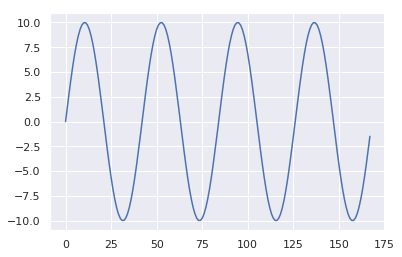

In [31]:
fig, (ax1) = plt.subplots(1, 1)
ax1.grid(True)
ax1.plot(x, y)
l = ax1.lines


In [32]:
x + x0


array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,
        21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,
        32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,
        43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,
        65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,
        76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,
        98.,  99., 100., 101., 102., 103., 104., 105., 106., 107., 108.,
       109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119.,
       120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130.,
       131., 132., 133., 134., 135., 136., 137., 138., 139., 140., 141.,
       142., 143., 144., 145., 146., 147., 148., 149., 150., 151., 152.,
       153., 154., 155., 156., 157., 158., 159., 16

In [33]:
y + y0


array([44.5       , 45.99042266, 47.44755174, 48.83883739, 50.13320058,
       51.30172738, 52.31831482, 53.16025404, 53.80873749, 54.24927912,
       54.47203797, 54.47203797, 54.24927912, 53.80873749, 53.16025404,
       52.31831482, 51.30172738, 50.13320058, 48.83883739, 47.44755174,
       45.99042266, 44.5       , 43.00957734, 41.55244826, 40.16116261,
       38.86679942, 37.69827262, 36.68168518, 35.83974596, 35.19126251,
       34.75072088, 34.52796203, 34.52796203, 34.75072088, 35.19126251,
       35.83974596, 36.68168518, 37.69827262, 38.86679942, 40.16116261,
       41.55244826, 43.00957734, 44.5       , 45.99042266, 47.44755174,
       48.83883739, 50.13320058, 51.30172738, 52.31831482, 53.16025404,
       53.80873749, 54.24927912, 54.47203797, 54.47203797, 54.24927912,
       53.80873749, 53.16025404, 52.31831482, 51.30172738, 50.13320058,
       48.83883739, 47.44755174, 45.99042266, 44.5       , 43.00957734,
       41.55244826, 40.16116261, 38.86679942, 37.69827262, 36.68

In [34]:
X = x + x0
Y = y + y0


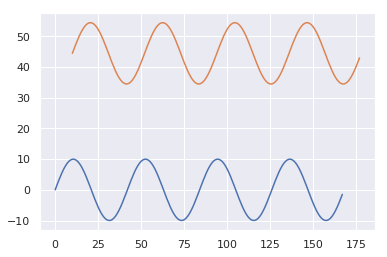

In [35]:
fig, (ax1) = plt.subplots(1, 1)
ax1.grid(True)
ax1.plot(x, y, X, Y)


In [44]:
prog = GCode.GCode()
prog.G28()
for x, y in zip(X, Y):
    break


In [47]:
prog = GCode.GCode()
prog.M3(S=255)
prog.G1(X=x, Y=y)


In [48]:
prog


<GCode>[cmds=2]

In [49]:
cnc.run(init())


5.145188331604004

In [51]:
cnc.run(prog)


0.32056331634521484

In [52]:
cnc.cmd("M5")


['ok', 'ok']

In [55]:
prog = GCode.GCode()
prog.G28()
prog.M3(S=255)
prog.G0(X=X[0], Y=Y[0])
for x, y in zip(X, Y):
    prog.G1(X=x, Y=y)
prog.M5()
prog.G28()


In [54]:
cnc.run(prog)


54.44862771034241